# Gradient Descent

In [3]:
from IPython.display import Image
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

In [4]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b # y = 0.5x + 0.8
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

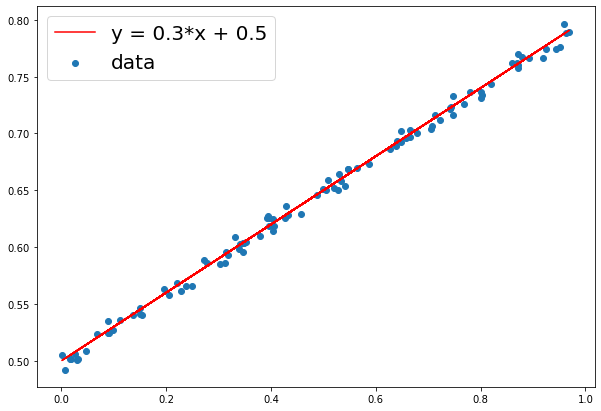

w: 0.3, b: 0.5


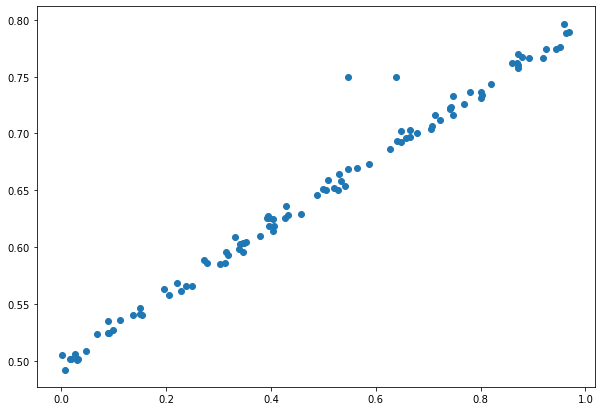

In [5]:
x , y = make_linear(w= 0.3, b= 0.5, size= 100, noise =0.01)

y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x,y)
plt.show()

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

In [23]:
w = np.random.uniform(low = -1.0 , high = 1.0)
b = np.random.uniform(low = -1.0 , high = 1.0)

In [24]:
print(w, b)

0.716735147154814 -0.8383568448287326


* 비용함수 (cost func.) 또는 손실함수 (loss func.) 평가 지표</br>
Mean Squared Error(MSE) : 잔차 제곱합의 평균

In [18]:
y_hat = w * x + b

## 오차(Error) 정의

In [19]:
error = ((y_hat - y) ** 2).mean() # 잔차제곱합

## 학습률 (Learning Rate)

In [17]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png')


한 번 학습할 때 얼마만큼 가중치(weight)를 업데이트 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 자칫 Error가 수렴하지 못하고 발산할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 가중치 갱신이 충분히 되지 않고, 학습이 끝나 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다

## Gradient Descent 구현 (단항식)

In [6]:
# 최대 반복 횟수
num_epoch = 300

# 학습률(learning_rate)
learning_rate = 0.01 


In [7]:
errors = [] 

w = np.random.uniform(low = -1.0 , high = 1.0)
b = np.random.uniform(low = -1.0 , high = 1.0)
print(w,b)

for epoch in range(num_epoch):
    y_hat = x * w + b #편미분 값 재적용
    error = ((y_hat - y)**2).mean()

    if error < 0.0005: #Early Stopping
        break

    #편미분
    w = w - learning_rate * ((y_hat- y) *x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error)

    if epoch % 25 == 0 :
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))



-0.2374078535439068 0.5288003178689211
 0 w = -0.23585, b = 0.53113 error = 0.07735
25 w = -0.20167, b = 0.58024 error = 0.04793
50 w = -0.17499, b = 0.61517 error = 0.03206
75 w = -0.15380, b = 0.63977 error = 0.02341
100 w = -0.13666, b = 0.65685 error = 0.01861
125 w = -0.12248, b = 0.66844 error = 0.01586
150 w = -0.11050, b = 0.67606 error = 0.01422
175 w = -0.10015, b = 0.68078 error = 0.01316
200 w = -0.09101, b = 0.68340 error = 0.01243
225 w = -0.08278, b = 0.68450 error = 0.01187
250 w = -0.07524, b = 0.68451 error = 0.01142
275 w = -0.06823, b = 0.68373 error = 0.01102
------------------------------------------------------------
299 w = -0.1, b = 0.7 error = 0.01067


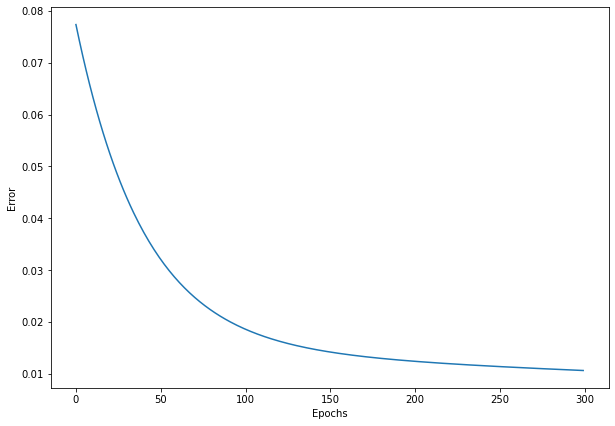

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식
샘플 데이터를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [9]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [10]:
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

* 가설함수

In [11]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

In [12]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.1

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b1 = np.random.uniform(low=-1.0, high=1.0)
b2 = np.random.uniform(low=-1.0, high=1.0)
b3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0006:
        break
    
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))


 0 w1 = 0.65030, w2 = -0.20035, w3 = 0.02489, b = 0.10186 error = 0.38395
 5 w1 = 0.71249, w2 = -0.09975, w3 = 0.12405, b = 0.26066 error = 0.10303
10 w1 = 0.72381, w2 = -0.05174, w3 = 0.17041, b = 0.31795 error = 0.05925
15 w1 = 0.71628, w2 = -0.02407, w3 = 0.19642, b = 0.33666 error = 0.05004
20 w1 = 0.70203, w2 = -0.00444, w3 = 0.21446, b = 0.34072 error = 0.04603
25 w1 = 0.68570, w2 = 0.01183, w3 = 0.22922, b = 0.33924 error = 0.04296
30 w1 = 0.66901, w2 = 0.02653, w3 = 0.24251, b = 0.33569 error = 0.04019
35 w1 = 0.65261, w2 = 0.04037, w3 = 0.25501, b = 0.33140 error = 0.03762
40 w1 = 0.63672, w2 = 0.05361, w3 = 0.26701, b = 0.32685 error = 0.03522
45 w1 = 0.62142, w2 = 0.06636, w3 = 0.27861, b = 0.32225 error = 0.03299
50 w1 = 0.60673, w2 = 0.07869, w3 = 0.28985, b = 0.31767 error = 0.03091
55 w1 = 0.59262, w2 = 0.09062, w3 = 0.30076, b = 0.31314 error = 0.02896
60 w1 = 0.57908, w2 = 0.10216, w3 = 0.31136, b = 0.30866 error = 0.02715
65 w1 = 0.56610, w2 = 0.11333, w3 = 0.32165, b

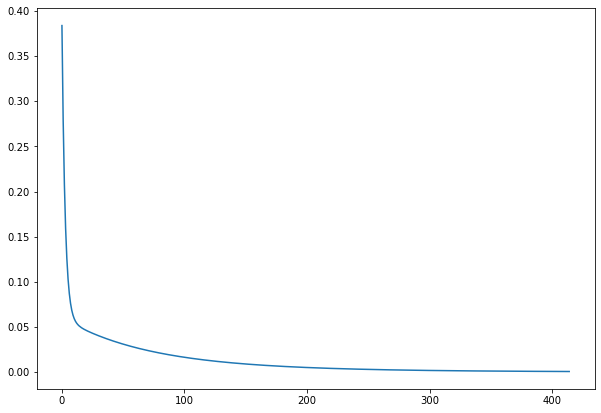

In [13]:
plt.figure(figsize=(10, 7))

plt.plot(errors)

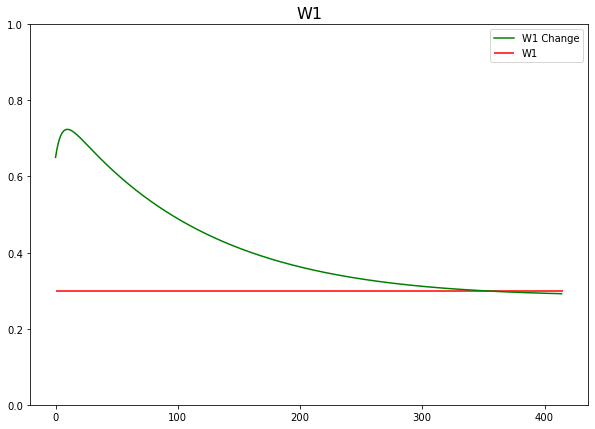

In [14]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

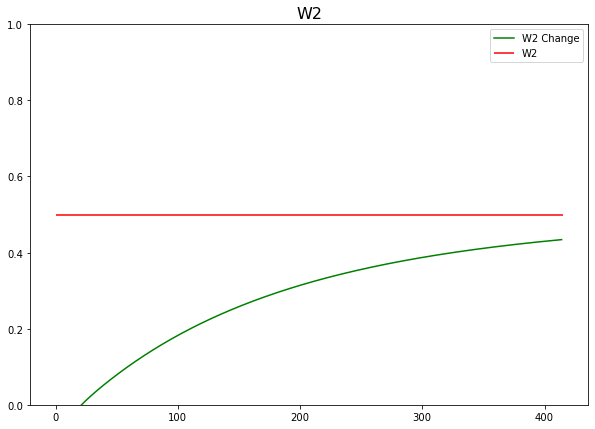

In [15]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()


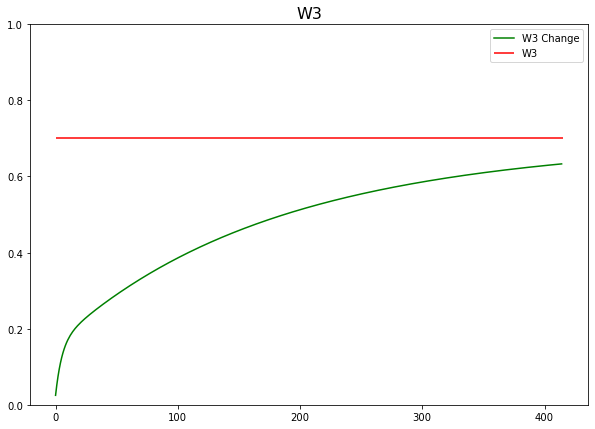

In [16]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()